# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [5]:
train.nunique()

Product_Identifier                1451
Supermarket_Identifier              10
Product_Supermarket_Identifier    4990
Product_Weight                     399
Product_Fat_Content                  3
Product_Shelf_Visibility          4638
Product_Type                        16
Product_Price                     3522
Supermarket_Opening_Year             9
Supermarket _Size                    3
Supermarket_Location_Type            3
Supermarket_Type                     4
Product_Supermarket_Sales         2686
dtype: int64

In [6]:
cat_col=[col for col in train.columns if train[col].nunique()<20]

In [7]:
num_col=list(set(train.columns)-set(cat_col))

In [8]:
cat_col

['Supermarket_Identifier',
 'Product_Fat_Content',
 'Product_Type',
 'Supermarket_Opening_Year',
 'Supermarket _Size',
 'Supermarket_Location_Type',
 'Supermarket_Type']

In [9]:
num_col

['Product_Supermarket_Sales',
 'Product_Weight',
 'Product_Supermarket_Identifier',
 'Product_Price',
 'Product_Shelf_Visibility',
 'Product_Identifier']

In [10]:
num_col=['Product_Price',
 'Product_Supermarket_Sales',
 'Product_Weight',
 'Product_Shelf_Visibility']

In [11]:
train['Supermarket _Size'].fillna('unknown',inplace=True)
train['Product_Weight'].fillna(train['Product_Weight'].mean(),inplace=True);

In [12]:
train.isnull().sum()

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket _Size                 0
Supermarket_Location_Type         0
Supermarket_Type                  0
Product_Supermarket_Sales         0
dtype: int64

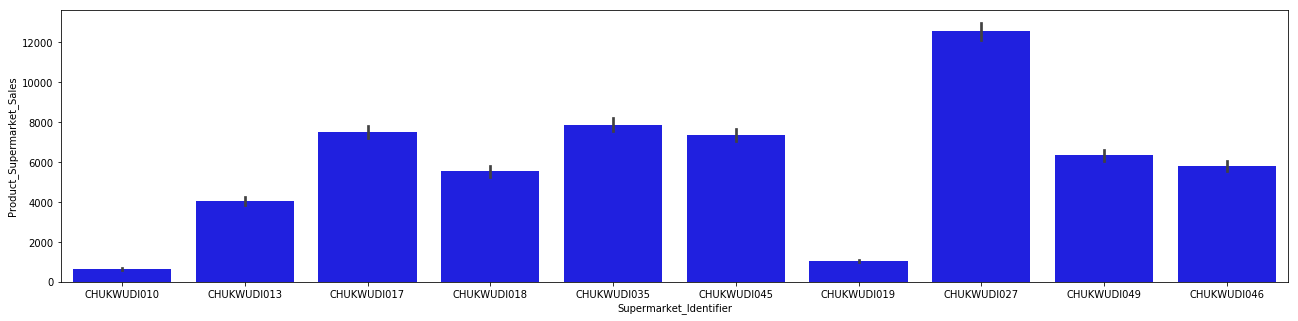

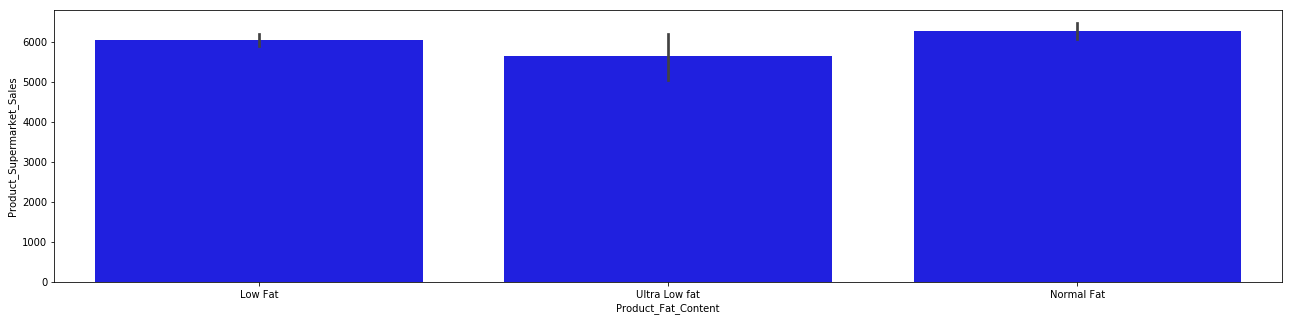

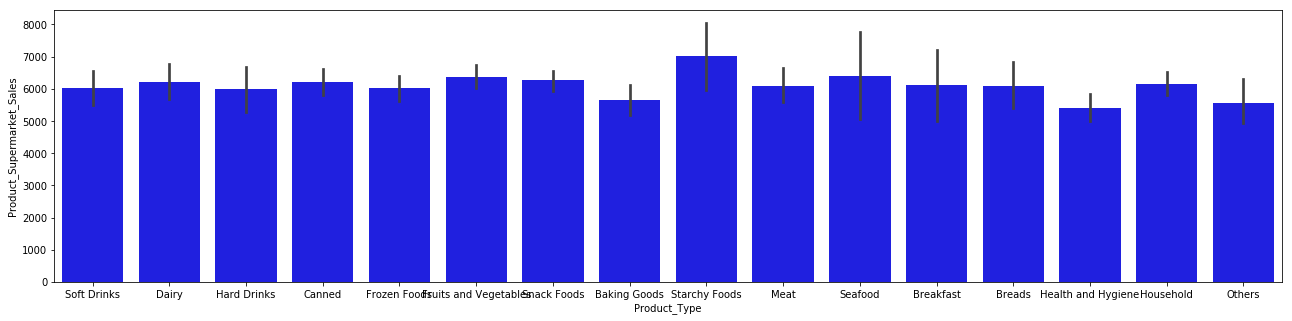

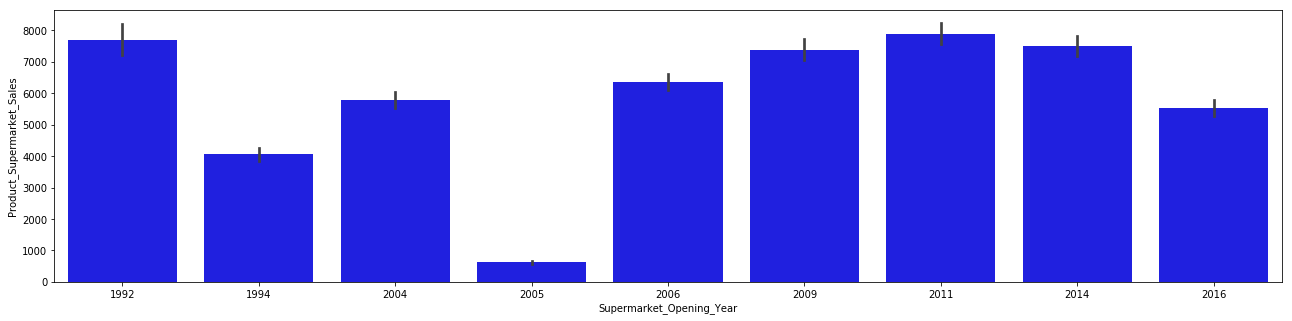

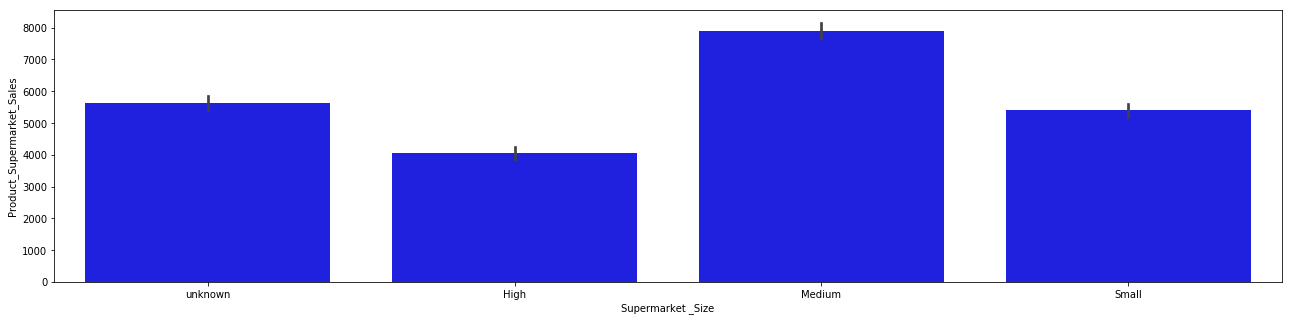

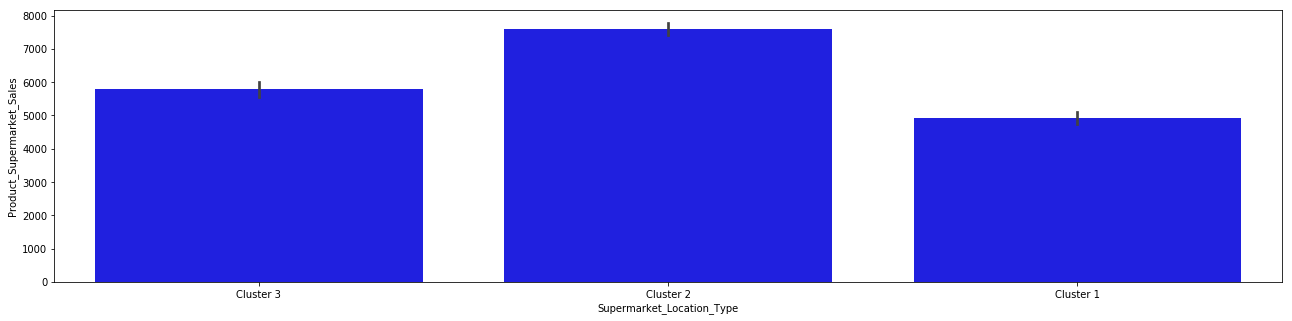

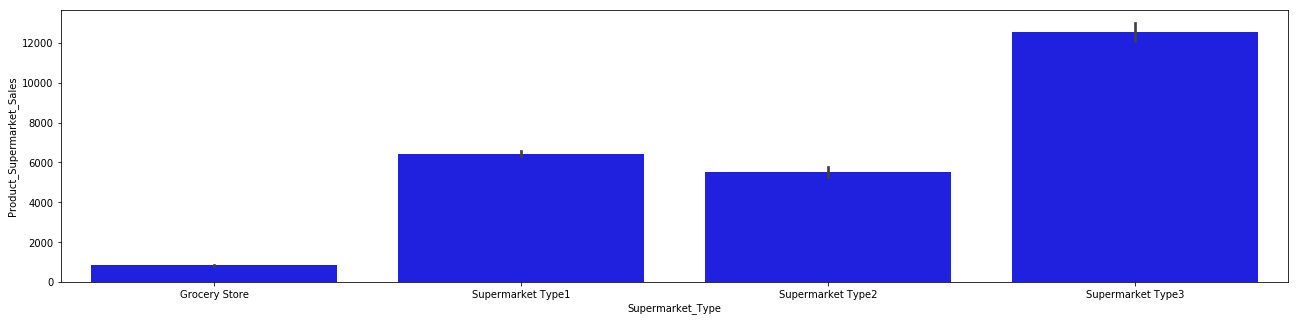

In [13]:
def plot_bar(data, cols, col_y = None):
    for col in cols:
        plt.figure(figsize=(22,5))
        sns.barplot(y=col_y, x=col, data=data,color='blue')
        plt.ylabel(col_y) # Set text for the x axis
        plt.xlabel(col)# Set text for y axis
        plt.show()
        
plot_bar(data=train,cols=cat_col,col_y='Product_Supermarket_Sales')

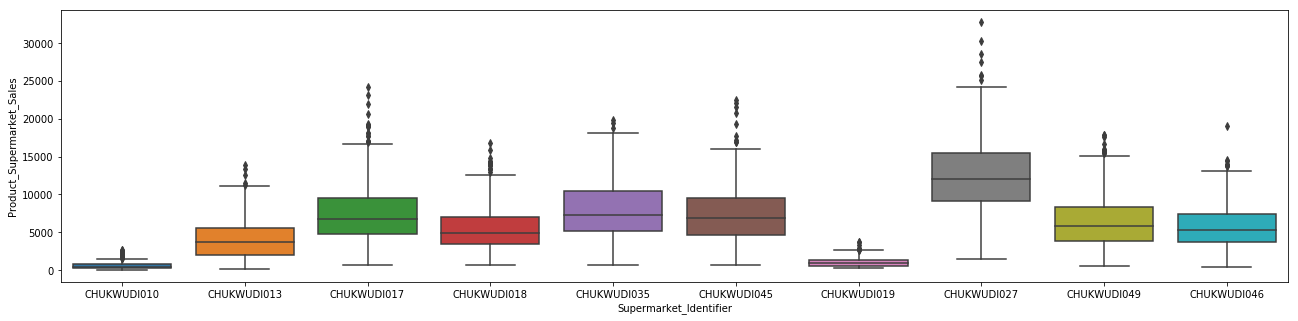

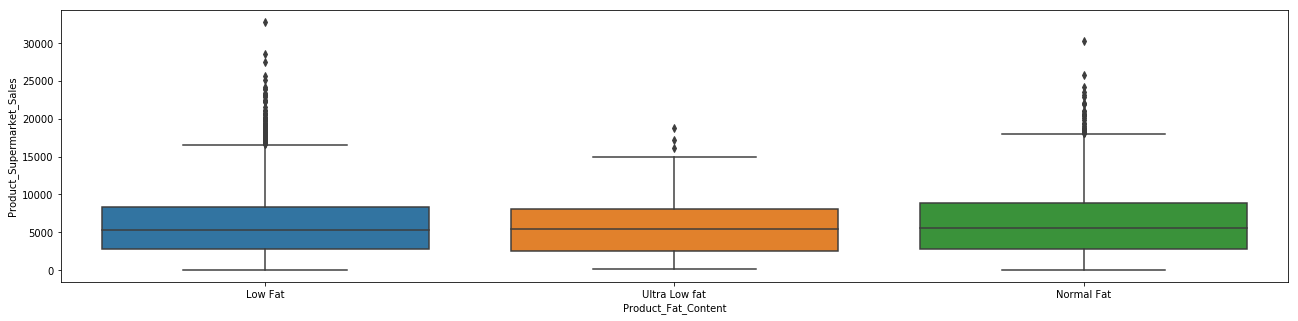

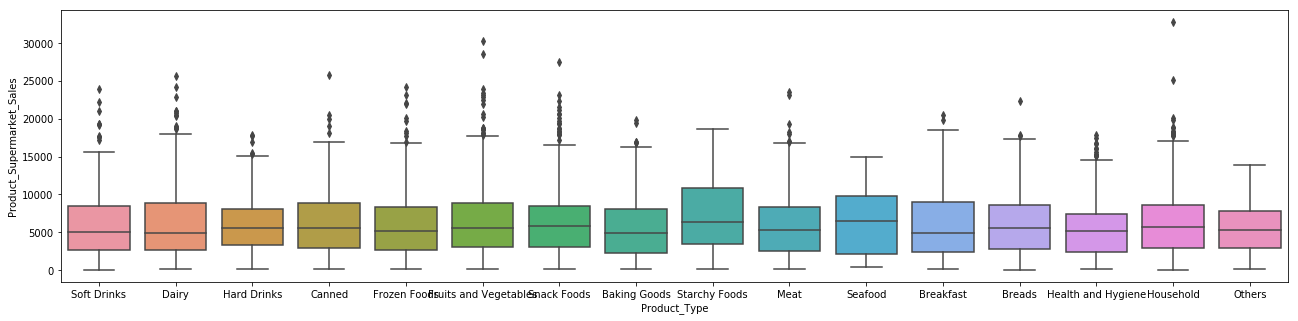

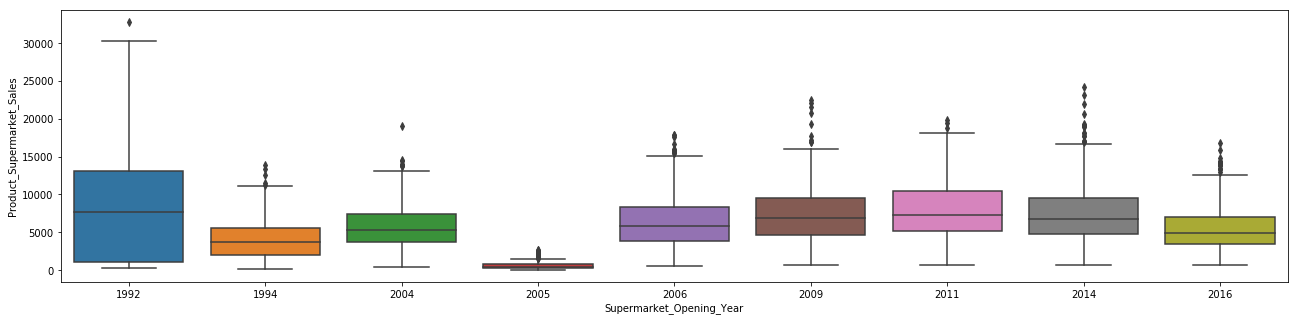

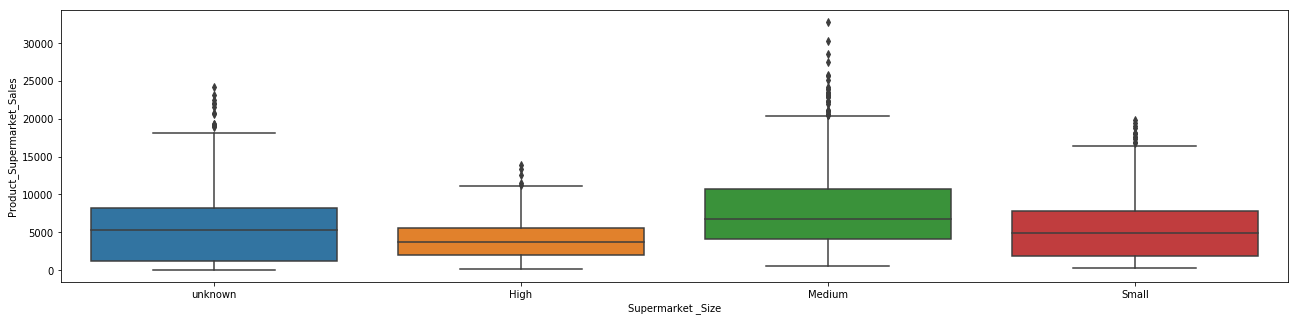

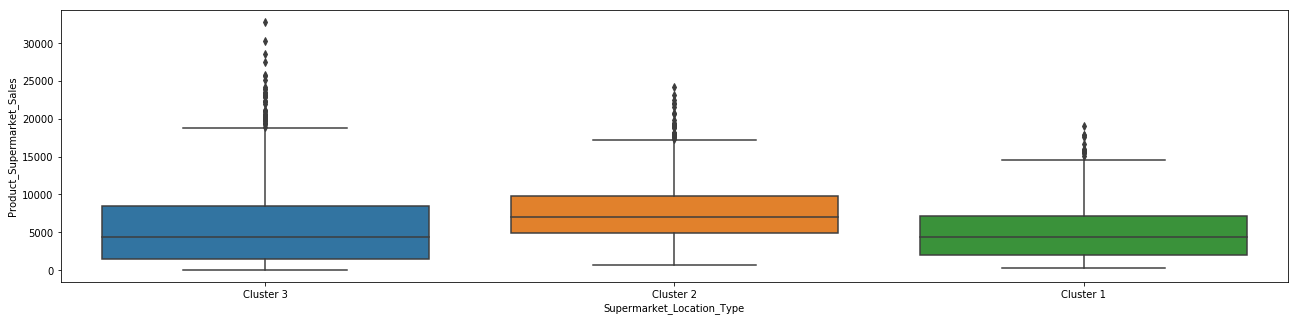

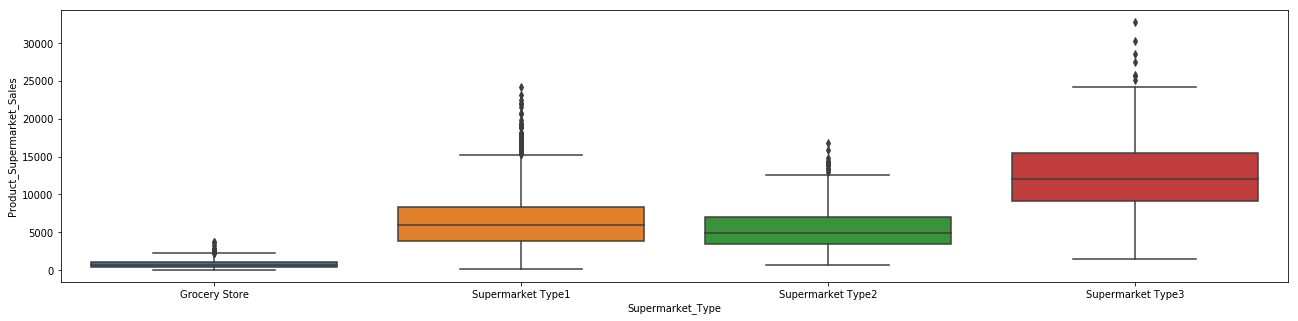

In [14]:
def plot_box(data, cols, col_y = None):
    for col in cols:
        plt.figure(figsize=(22,5))
        sns.boxplot(y=col_y, x=col, data=data)
        plt.ylabel(col_y) # Set text for the x axis
        plt.xlabel(col)# Set text for y axis
        plt.show()
        
plot_box(data=train,cols=cat_col,col_y='Product_Supermarket_Sales')

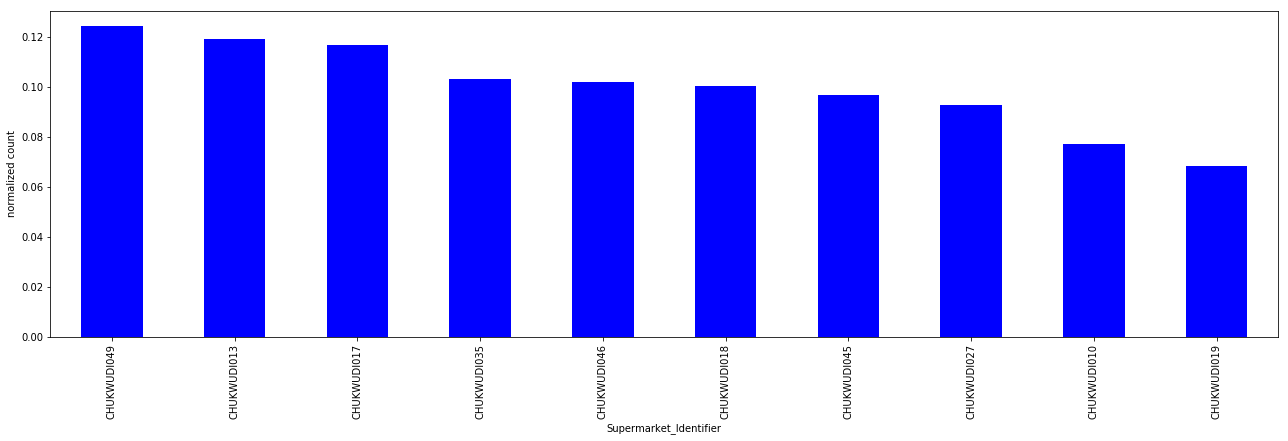

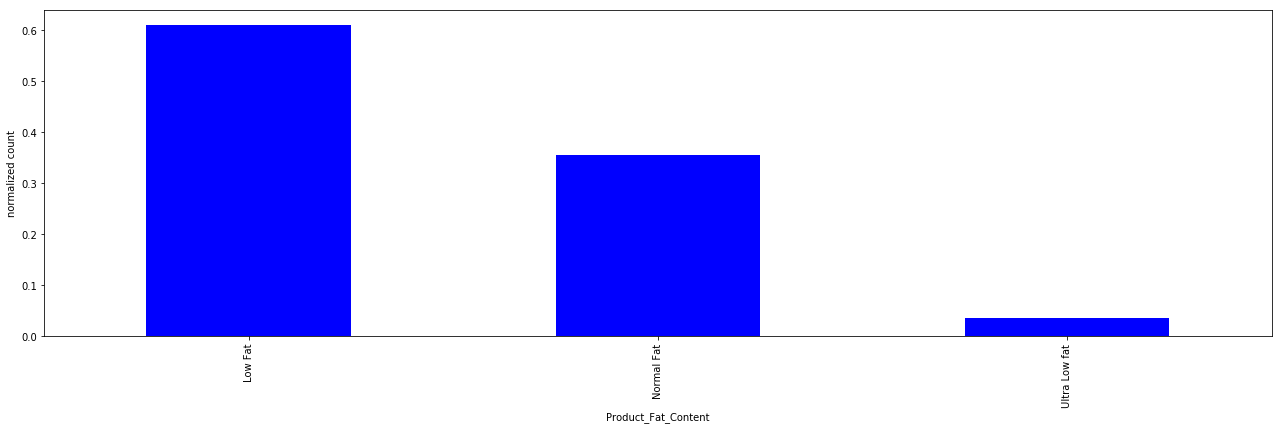

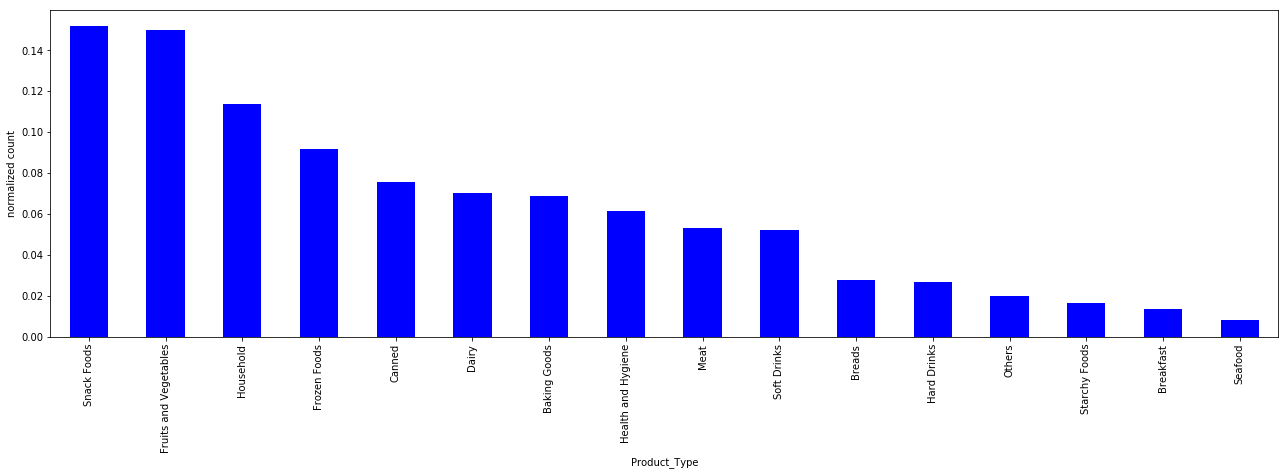

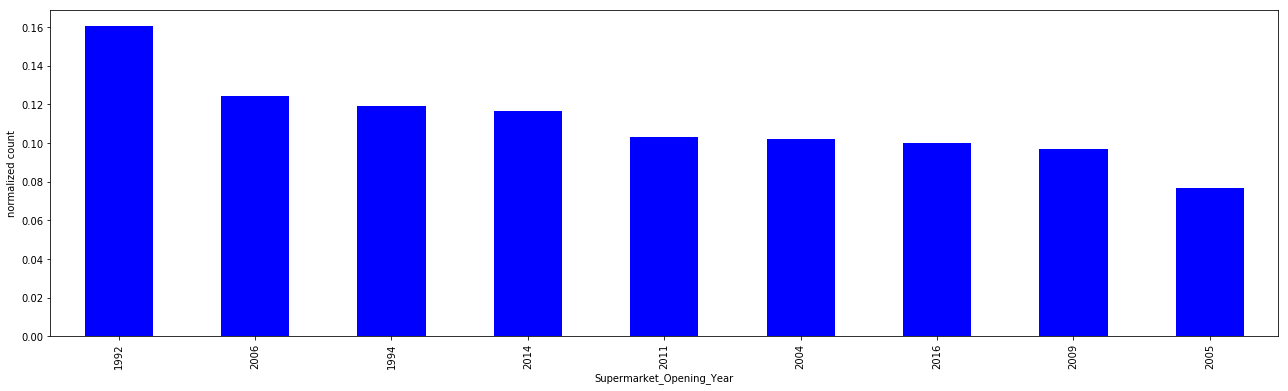

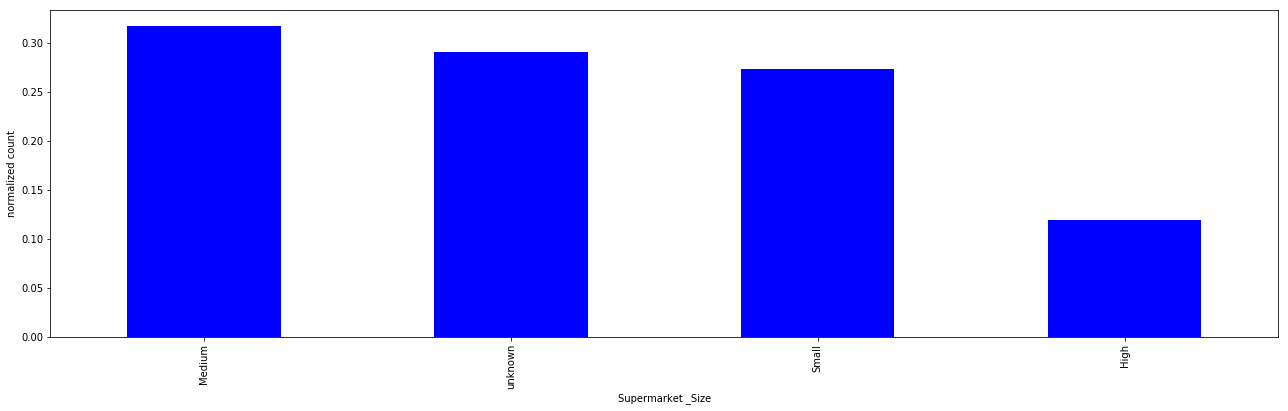

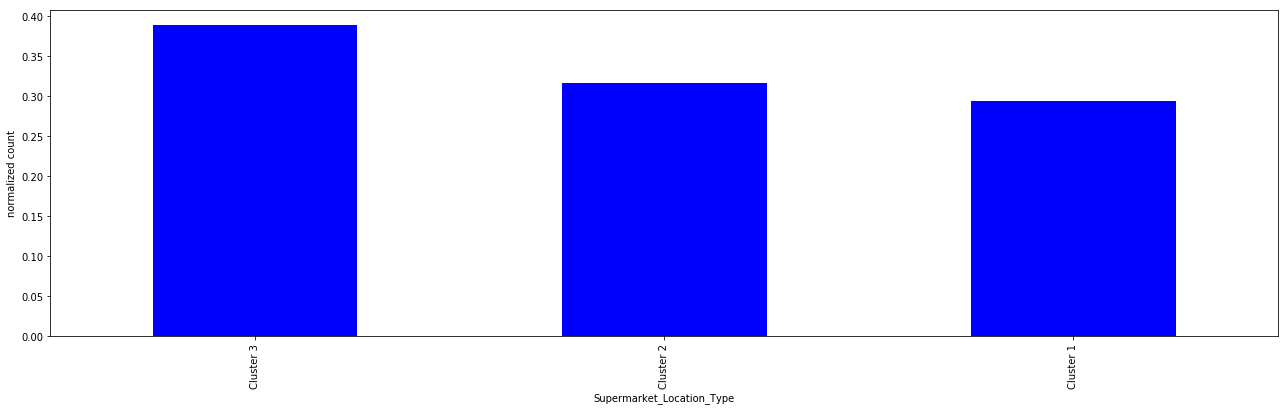

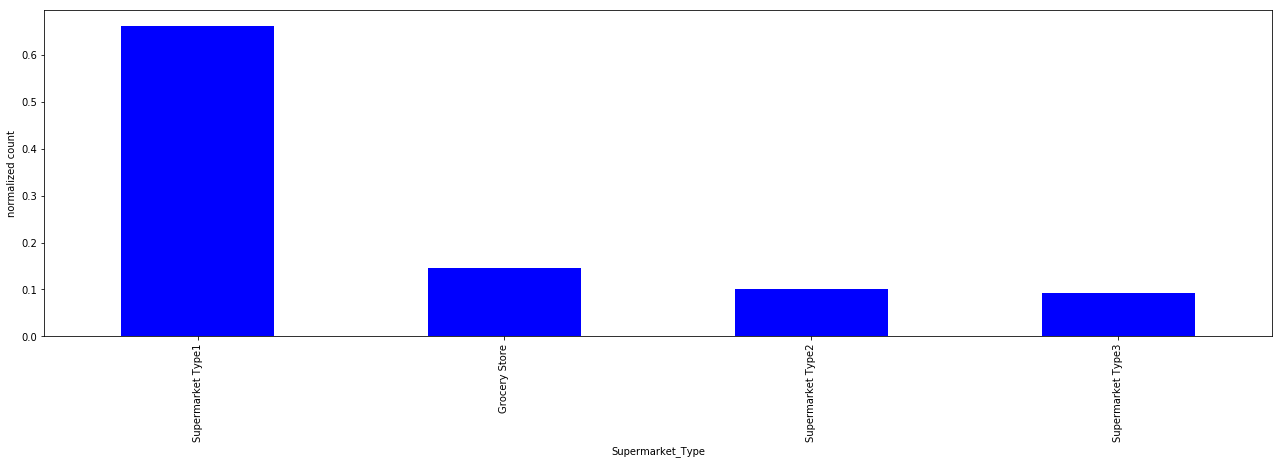

In [15]:
def plot_count(data, cols):
    for col in cols:
        plt.figure(figsize=(22,6))
        (train[col].value_counts()/train[col].value_counts().sum()).plot.bar(color='blue')
        plt.xlabel(col)# Set text for x axis
        plt.ylabel('normalized count')# Set text for y axis
        plt.show()
        
plot_count(data=train,cols=cat_col)

C:\Users\ADEBAYO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\ADEBAYO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ADEBAYO\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


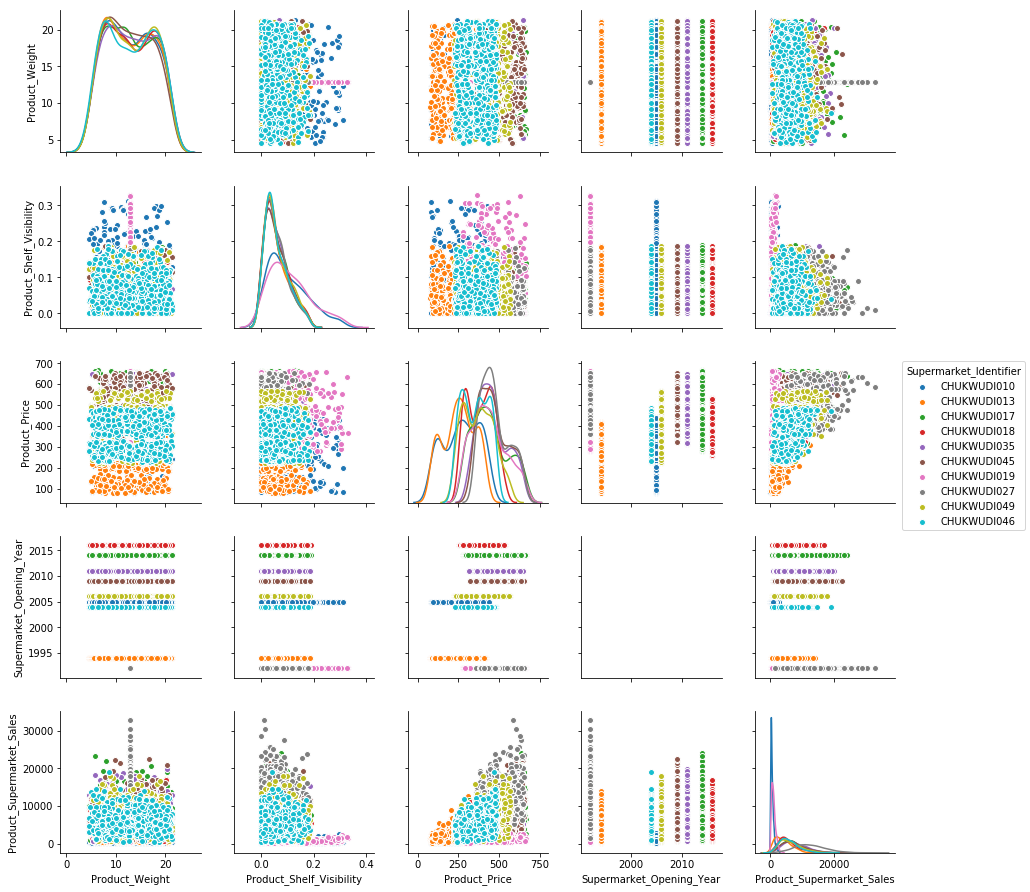

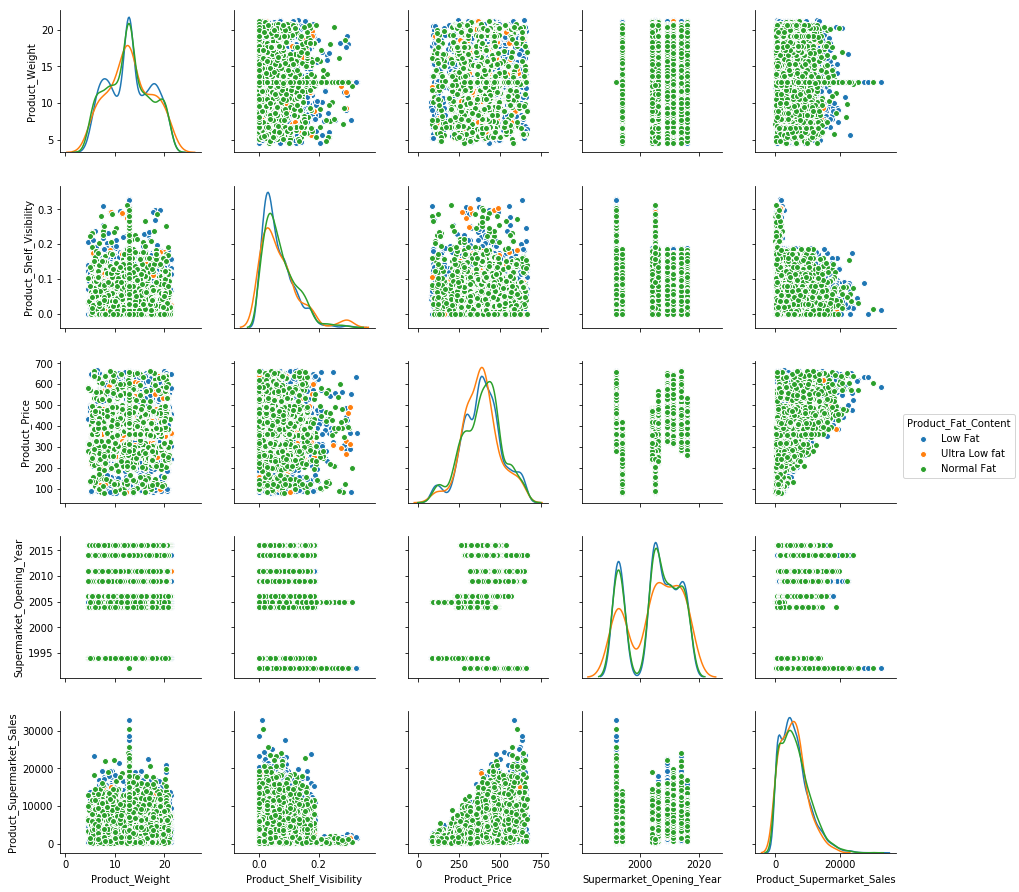

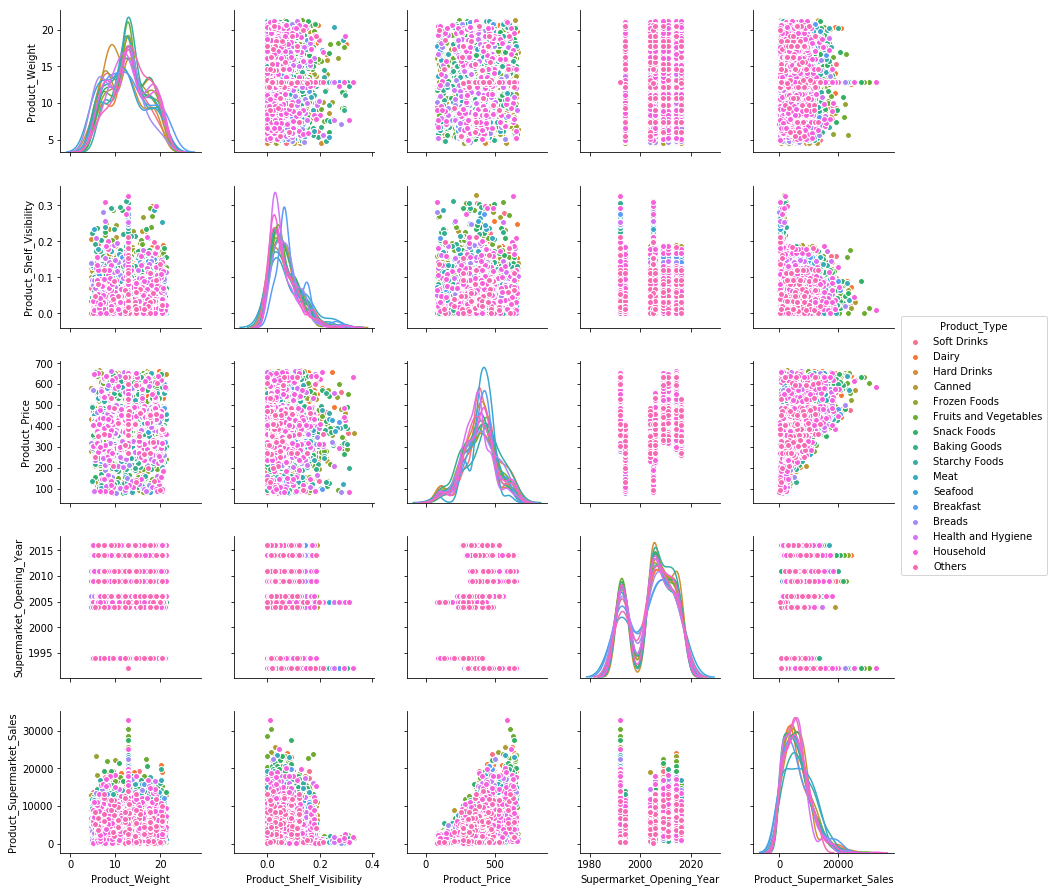

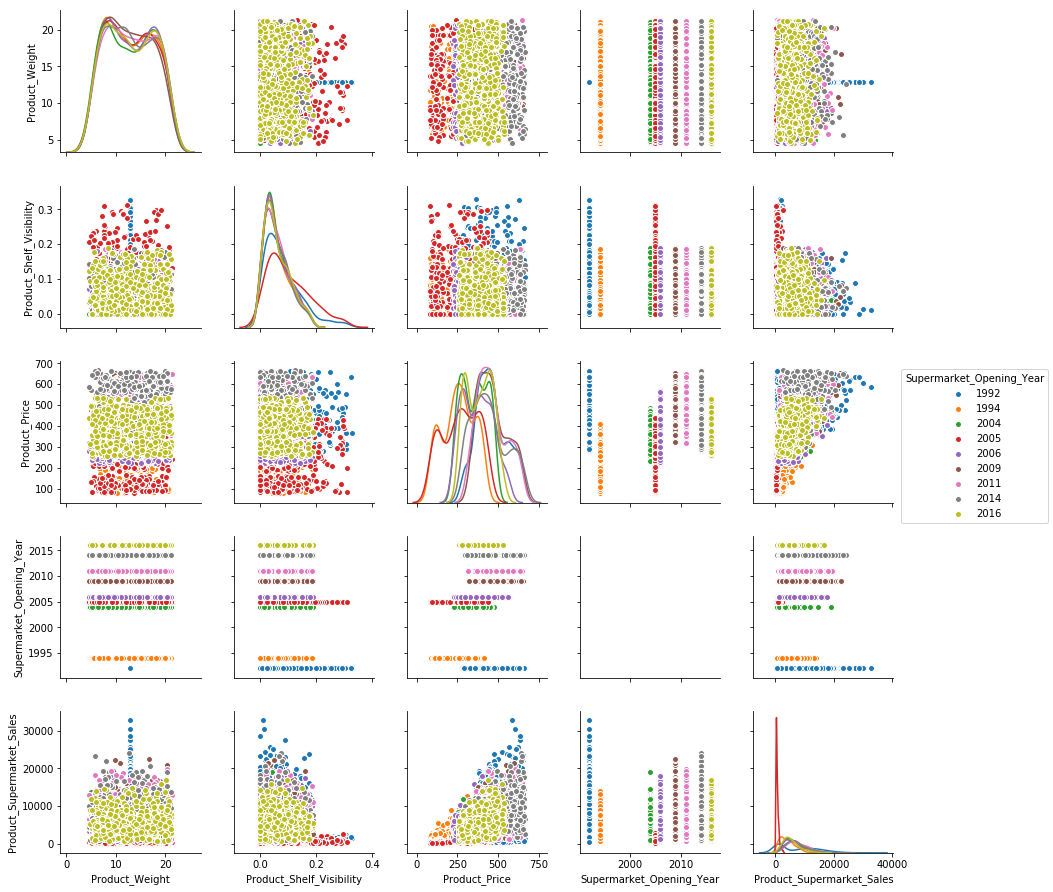

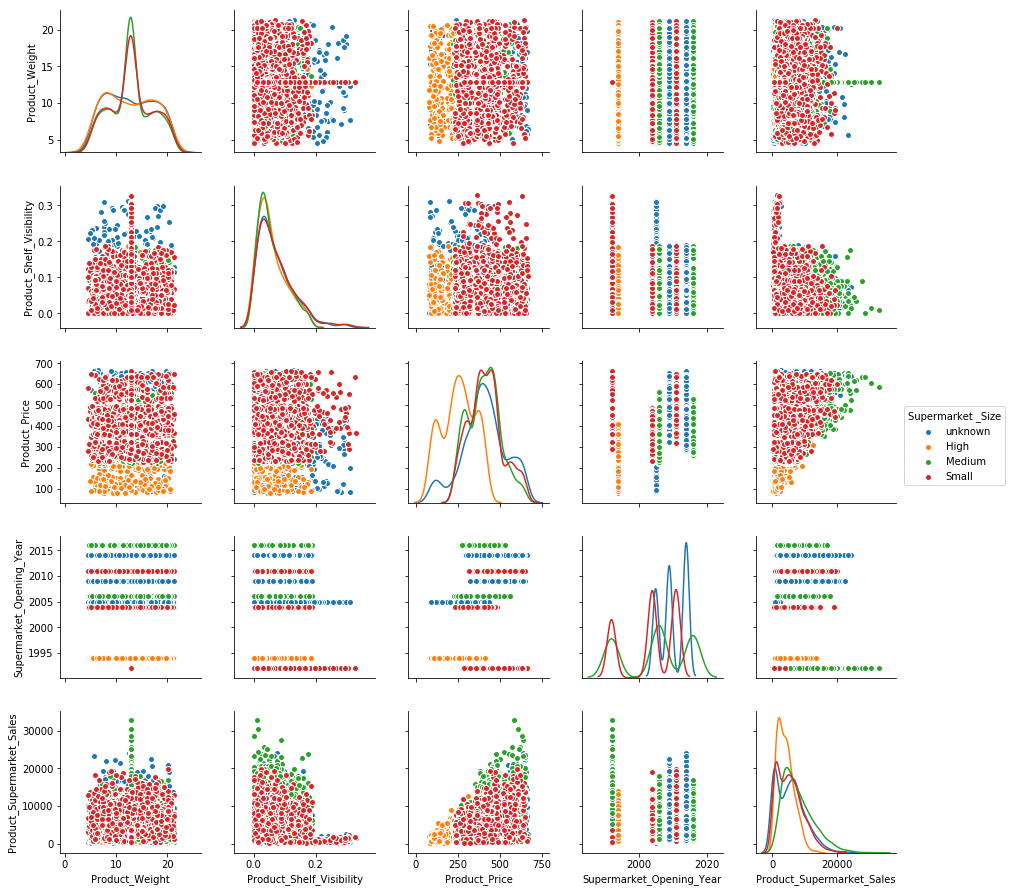

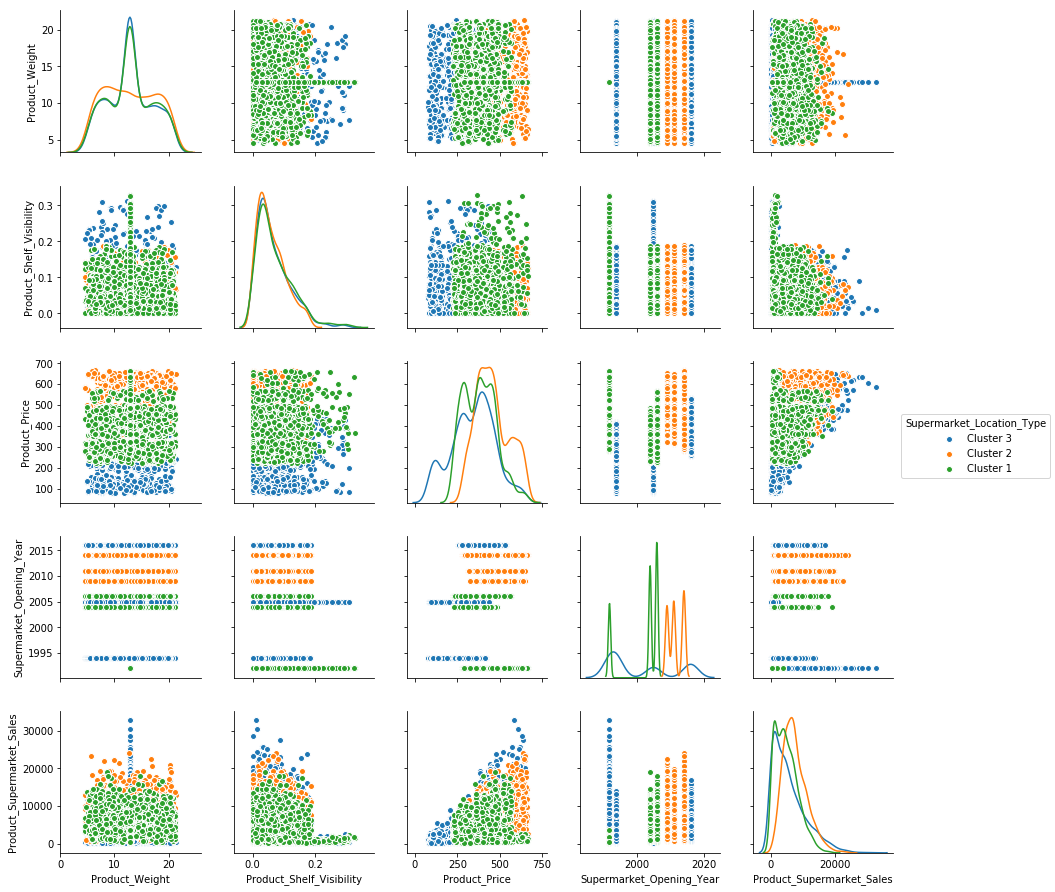

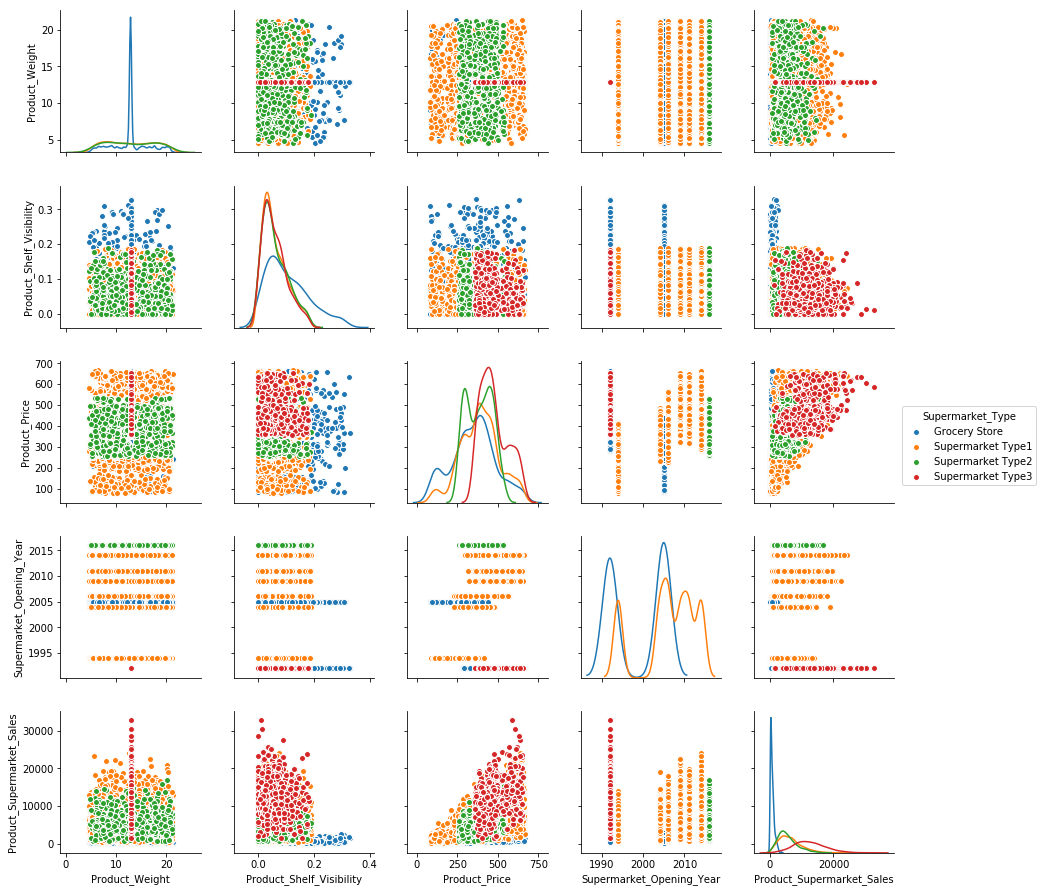

In [16]:
def plot_pair(data, cols):
    for col in cols:
        plt.figure(figsize=(22,5))
        sns.pairplot(data,diag_kind='kde',hue=col)
        #plt.ylabel(col_y) # Set text for the y axis
        #plt.xlabel(col)# Set text for x axis
        plt.show()
        
plot_pair(data=train,cols=cat_col)

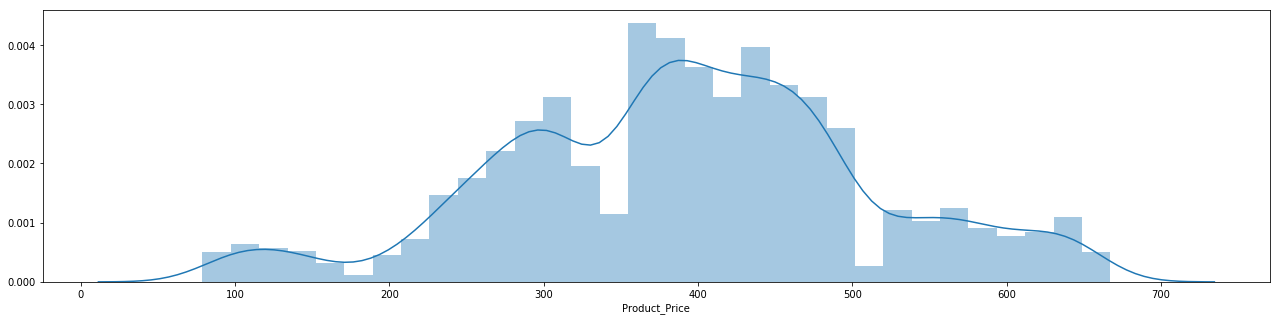

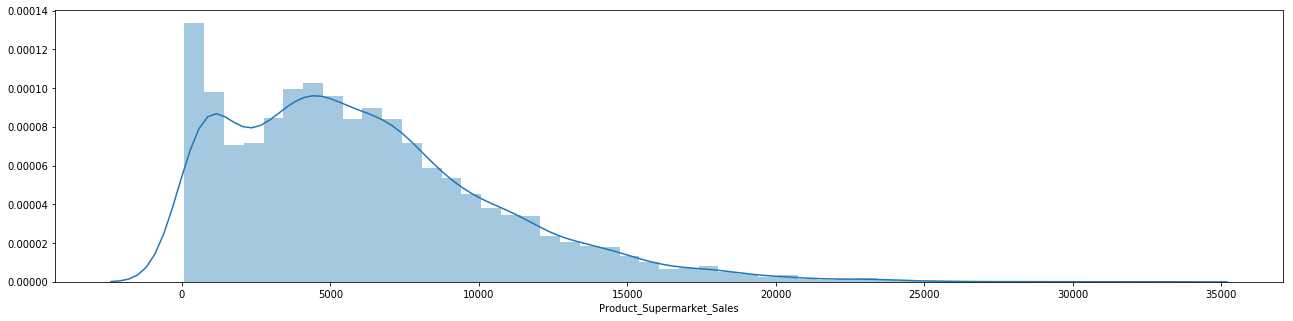

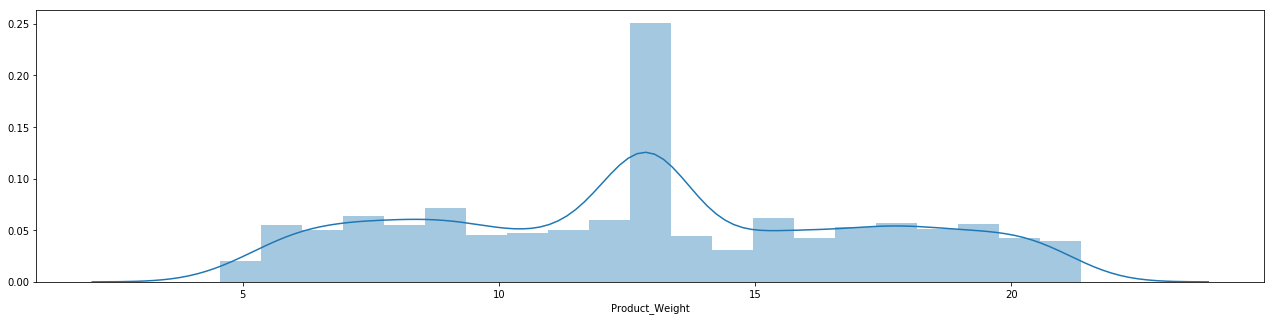

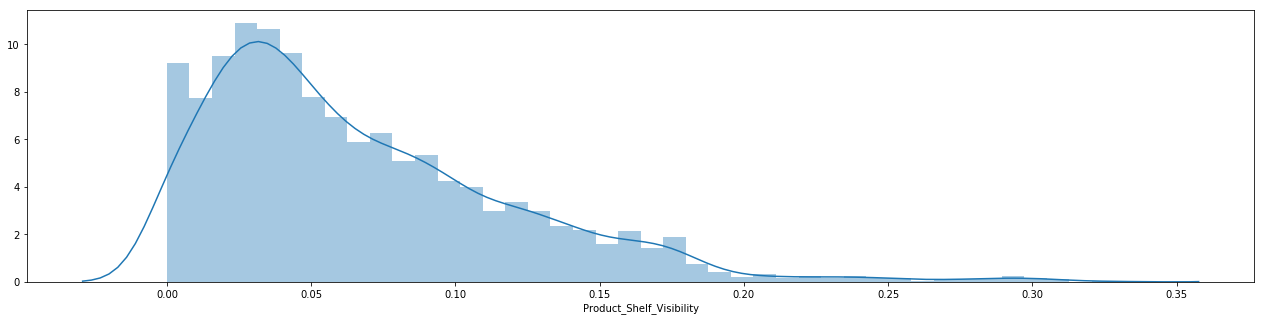

In [17]:
def plot_num(data, cols):
    for col in cols:
        plt.figure(figsize=(22,5))
        sns.distplot(data[col])
        #plt.ylabel(col_y) # Set text for the y axis
        #plt.xlabel(col)# Set text for x axis
        plt.show()
        
plot_num(data=train,cols=num_col)